<a href="https://colab.research.google.com/github/Deepak345/OCR-summariser/blob/master/lsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [1]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize 

In [30]:
data = "Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns. Paragraphs are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns. Values close to 1 represent very similar paragraphs while values close to 0 represent very dissimilar paragraphs."
data

'Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns. Paragraphs are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns. Values close to 1 represent very similar paragraphs while values close to 0 represent very dissimilar paragraphs.

In [31]:
docs = sent_tokenize(data)
text = docs
text

['Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms.',
 'LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis).',
 'A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.',
 'Paragraphs are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns.',
 'Values close to 1 represent very similar paragraphs while values close to 0 represent very dissi

In [32]:
df = pd.DataFrame(docs, columns=['sent'])
df

,sent
0,Latent semantic analysis (LSA) is a technique ...
1,LSA assumes that words that are close in meani...
2,A matrix containing word counts per paragraph ...
3,Paragraphs are then compared by taking the cos...
4,Values close to 1 represent very similar parag...


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [35]:
df['sent'] = df['sent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['sent'][0]

'Latent semantic analysis (LSA) technique natural language processing, particular distributional semantics, analyzing relationships set documents terms contain producing set concepts related documents terms.'

In [36]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2, smooth_idf = True)
vectorizer.fit(df['sent'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [37]:
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'lsa': 3, 'technique': 7, 'distributional': 2, 'words': 9, 'close': 0, 'similar': 6, 'text': 8, 'represent': 5, 'columns': 1, 'paragraphs': 4}
[1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718]


In [38]:
vector = vectorizer.transform(df['sent'])
# print(vector)
print(vector.shape)
tfidf = vector.toarray()
# tfidf

(5, 10)


In [39]:
tfidf = tfidf.T
print(tfidf.shape)
print(tfidf)

(10, 5)
[[0.         0.40824829 0.         0.         0.5547002 ]
 [0.         0.         0.60302269 0.70710678 0.        ]
 [0.57735027 0.40824829 0.         0.         0.        ]
 [0.57735027 0.40824829 0.         0.         0.        ]
 [0.         0.         0.         0.70710678 0.5547002 ]
 [0.         0.         0.60302269 0.         0.5547002 ]
 [0.         0.40824829 0.         0.         0.2773501 ]
 [0.57735027 0.         0.30151134 0.         0.        ]
 [0.         0.40824829 0.30151134 0.         0.        ]
 [0.         0.40824829 0.30151134 0.         0.        ]]


In [0]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components = -(-len(text)//2),algorithm='randomized', n_iter=10, random_state=22)

In [41]:
svd_model.fit(tfidf)

svd_model.n_components

3

In [42]:
svd_model.components_

array([[ 0.30735003,  0.45000746,  0.52083595,  0.42495099,  0.50117444],
       [ 0.62984917,  0.51310073, -0.17410579, -0.50185479, -0.24051322],
       [-0.41432952,  0.356272  , -0.42650899, -0.31780859,  0.64690733]])

In [0]:
svc = svd_model.components_
svc = svc.tolist()

In [19]:
svc

[[0.3073500337440256,
  0.4500074569621447,
  0.520835947161369,
  0.42495098535202247,
  0.5011744423141258],
 [0.6298491686324654,
  0.5131007328141923,
  -0.17410578876022723,
  -0.5018547874025349,
  -0.24051322092530797],
 [-0.4143295175773899,
  0.35627199632993245,
  -0.426508987538849,
  -0.31780859055121163,
  0.6469073340252146]]

In [20]:
summary = ''
p_pos = 0
for _ in range(len(svc)):
  m = max(svc[_])
  print(m)
  pos = svc[_].index(m)
  print(pos)
  print(text[pos])
  if pos > p_pos:
    summary = summary + '\n' + text[pos]
  else:
    summary = text[pos] + '\n' + summary  
  p_pos = pos
print(summary)

0.520835947161369
2
A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.
0.6298491686324654
0
Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms.
0.6469073340252146
4
Values close to 1 represent very similar paragraphs while values close to 0 represent very dissimilar paragraphs.
Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related 

## Implemented Summariser

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords

from sklearn.decomposition import TruncatedSVD

In [0]:
def preprocessing(data):
  text = sent_tokenize(data)
  df = pd.DataFrame(text, columns=['sent'])

  stop = stopwords.words('english')
  df['sent'] = df['sent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  return text, df

In [0]:
def summary(text, df) :
  vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2, smooth_idf = True)
  vectorizer.fit(df['sent'])
  vector = vectorizer.transform(df['sent'])
  tfidf = vector.toarray()
  tfidf = tfidf.T

  svd_model = TruncatedSVD(n_components = -(-len(text)//3),algorithm='randomized', n_iter=10, random_state=22)
  svd_model.fit(tfidf)
  svc = svd_model.components_
  svc = svc.tolist()

  summary = ''
  p_pos = 0
  for _ in range(len(svc)):
    m = max(svc[_])
    # print(m)
    pos = svc[_].index(m)
    # print(pos)
    # print(text[pos])
    if pos > p_pos:
      summary = summary + '\n' + text[pos]
    else:
      summary = text[pos] + '\n' + summary  
    p_pos = pos
  return summary

In [67]:
data = "Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns. Paragraphs are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns. Values close to 1 represent very similar paragraphs while values close to 0 represent very dissimilar paragraphs."
text,df = preprocessing(data)
summar = summary(text, df)

print(summar)

Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms.

A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.
Values close to 1 represent very similar paragraphs while values close to 0 represent very dissimilar paragraphs.


# Implementing rouge

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = xxx
os.environ["KAGGLE_KEY"] = xxxx

In [11]:
!kaggle datasets download -d sunnysai12345/news-summary

 25% 5.00M/19.8M [00:00<00:01, 14.6MB/s]
100% 19.8M/19.8M [00:00<00:00, 44.6MB/s]


In [12]:
!unzip news-summary.zip

Archive:  news-summary.zip
  inflating: news_summary.csv        
  inflating: news_summary_more.csv   


In [0]:
import pandas as pd
import pandas_profiling

In [0]:
df = pd.read_csv("news_summary.csv", encoding='latin-1')

In [15]:
df.describe()

,author,date,headlines,read_more,text,ctext
count,4514,4514,4514,4514,4514,4396
unique,45,240,4514,4461,4514,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",Rajkummar Rao starrer Newton wins award at Ber...,http://indiatoday.intoday.in/story/assembly-el...,The first rail freight linking the UK to China...,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...
freq,559,76,1,13,1,13


In [16]:
df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [0]:
df = df.drop(labels=['author', 'date', 'headlines', 'read_more'], axis = 1)

In [18]:
df['text'][0]

'The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.'

In [19]:
df['ctext'][0]

'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [21]:
!pip install rouge

In [0]:
from rouge import Rouge 
rouge = Rouge()

In [0]:
reference = df['text'][0]

In [0]:
data = df['ctext'][0]

text,d = preprocessing(data)
summar = summary(text, d)

In [26]:
scores_custom = rouge.get_scores(summar, reference)
scores_custom

[{'rouge-1': {'f': 0.2519684992349185,
   'p': 0.20253164556962025,
   'r': 0.3333333333333333},
  'rouge-2': {'f': 0.0636942628244557,
   'p': 0.05102040816326531,
   'r': 0.0847457627118644},
  'rouge-l': {'f': 0.15571599205407627,
   'p': 0.13924050632911392,
   'r': 0.22916666666666666}}]

## **Evaluation**

### Baseline 

In [27]:
  ! pip install git+https://github.com/miso-belica/sumy.git

  Cloning https://github.com/miso-belica/sumy.git to /tmp/pip-req-build-73w1x0t9
  Running command git clone -q https://github.com/miso-belica/sumy.git /tmp/pip-req-build-73w1x0t9
     |████████████████████████████████| 10.0MB 22.5MB/s 
  Created wheel for sumy: filename=sumy-0.8.1-py2.py3-none-any.whl size=86993 sha256=a5e4cc0bec0b2d5f38e75a47d9cf25277f30f7dee3a48cd5ae1aa460b643ed92
  Stored in directory: /tmp/pip-ephem-wheel-cache-3n4wm159/wheels/a3/4f/24/b64d78315f591ef9b7cdcdf3a70bd060d0475ec927c0d914a0
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21682 sha256=b685c0e34d6ca7716a7a0a8b16a3dee6c5c70dc094d1524179ad7b885bc0a991
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627360 sha256=d9eab3dae7e89a3ed2199212d7e406a9780e333667691325b08eed447c6cd1a4
  Stored in directory: /root/.cache/pip/wheels/a

In [0]:

from gensim.summarization import summarize
from sumy.utils import get_stop_words
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer as sumytoken
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.utils import get_stop_words
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer as sumytoken

from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.utils import get_stop_words
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer as sumytoken

from sumy.summarizers.luhn import LuhnSummarizer


def gensim_summarizer(text):
    return (summarize(text))

def lexrank_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT):
    parser = PlaintextParser.from_string((text), sumytoken(LANGUAGE))
    summarizer_LexRank = LexRankSummarizer(stemmer)
    summarizer_LexRank.stop_words = get_stop_words(LANGUAGE)
    sentences = []
    for sentence in summarizer_LexRank(parser.document, SENTENCES_COUNT):
        a = sentence
        sentences.append(str(a))
    return " ".join(sentences)

def lsa_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT):
    parser = PlaintextParser.from_string((text), sumytoken(LANGUAGE))
    summarizer_lsa = Summarizer(stemmer)
    summarizer_lsa.stop_words = get_stop_words(LANGUAGE)
    sentences = []
    for sentence in summarizer_lsa(parser.document, SENTENCES_COUNT):
        a = sentence
        sentences.append(str(a))
    return " ".join(sentences)

def luhn_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT):
    parser = PlaintextParser.from_string(text, sumytoken(LANGUAGE))
    summarizer_luhn = LuhnSummarizer(stemmer)
    summarizer_luhn.stop_words = get_stop_words(LANGUAGE)
    sentences = []
    for sentence in summarizer_luhn(parser.document, SENTENCES_COUNT):
        a = sentence
        sentences.append(str(a))
    return " ".join(sentences)



In [0]:
from sumy.nlp.stemmers import Stemmer

LANGUAGE = "english"
stemmer = Stemmer(LANGUAGE)
text = df['ctext'][0]
SENTENCES_COUNT = -(-len(text)//3)

gensim_summary = gensim_summarizer(text)
lexrank_summary = lexrank_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT)
lsa_summary = lsa_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT)
luhn_summary = luhn_summarizer(text, stemmer, LANGUAGE, SENTENCES_COUNT)

In [30]:
scores_gensim = rouge.get_scores(gensim_summary, reference)
scores_gensim

[{'rouge-1': {'f': 0.44848484435922875,
   'p': 0.3162393162393162,
   'r': 0.7708333333333334},
  'rouge-2': {'f': 0.25471697711507657,
   'p': 0.17647058823529413,
   'r': 0.4576271186440678},
  'rouge-l': {'f': 0.3269205498168501,
   'p': 0.29914529914529914,
   'r': 0.7291666666666666}}]

In [31]:
scores_lexrank = rouge.get_scores(lexrank_summary, reference)
scores_lexrank

[{'rouge-1': {'f': 0.2825278781089261,
   'p': 0.17194570135746606,
   'r': 0.7916666666666666},
  'rouge-2': {'f': 0.14427860446065696,
   'p': 0.08454810495626822,
   'r': 0.4915254237288136},
  'rouge-l': {'f': 0.17354057099401488,
   'p': 0.167420814479638,
   'r': 0.7708333333333334}}]

In [32]:
scores_lsa = rouge.get_scores(lsa_summary, reference)
scores_lsa

[{'rouge-1': {'f': 0.2825278781089261,
   'p': 0.17194570135746606,
   'r': 0.7916666666666666},
  'rouge-2': {'f': 0.14427860446065696,
   'p': 0.08454810495626822,
   'r': 0.4915254237288136},
  'rouge-l': {'f': 0.17354057099401488,
   'p': 0.167420814479638,
   'r': 0.7708333333333334}}]

In [33]:
scores_luhn = rouge.get_scores(luhn_summary, reference)
scores_luhn

[{'rouge-1': {'f': 0.2825278781089261,
   'p': 0.17194570135746606,
   'r': 0.7916666666666666},
  'rouge-2': {'f': 0.14427860446065696,
   'p': 0.08454810495626822,
   'r': 0.4915254237288136},
  'rouge-l': {'f': 0.17354057099401488,
   'p': 0.167420814479638,
   'r': 0.7708333333333334}}]

In [35]:
scores_custom

[{'rouge-1': {'f': 0.2519684992349185,
   'p': 0.20253164556962025,
   'r': 0.3333333333333333},
  'rouge-2': {'f': 0.0636942628244557,
   'p': 0.05102040816326531,
   'r': 0.0847457627118644},
  'rouge-l': {'f': 0.15571599205407627,
   'p': 0.13924050632911392,
   'r': 0.22916666666666666}}]

#### Using ROUGE-1 score for Evaluation:

In [36]:
scores_custom[0]['rouge-1']
pd.DataFrame(list(scores_custom[0]['rouge-1'].items())).T

,0,1,2
0,f,p,r
1,0.251968,0.202532,0.333333


In [37]:
all_scores = [ scores_custom[0]['rouge-1'], scores_gensim[0]['rouge-1'], scores_lexrank[0]['rouge-1'], scores_lsa[0]['rouge-1'], scores_luhn[0]['rouge-1'] ]
all_scores

[{'f': 0.2519684992349185, 'p': 0.20253164556962025, 'r': 0.3333333333333333},
 {'f': 0.44848484435922875, 'p': 0.3162393162393162, 'r': 0.7708333333333334},
 {'f': 0.2825278781089261, 'p': 0.17194570135746606, 'r': 0.7916666666666666},
 {'f': 0.2825278781089261, 'p': 0.17194570135746606, 'r': 0.7916666666666666},
 {'f': 0.2825278781089261, 'p': 0.17194570135746606, 'r': 0.7916666666666666}]

In [38]:
pd.DataFrame(all_scores)

,f,p,r
0,0.251968,0.202532,0.333333
1,0.448485,0.316239,0.770833
2,0.282528,0.171946,0.791667
3,0.282528,0.171946,0.791667
4,0.282528,0.171946,0.791667


In [40]:
labels = pd.DataFrame(['custom', 'gensim', 'lexrank', 'lsa', 'luhn'], columns=['summariser'])
labels

,summariser
0,custom
1,gensim
2,lexrank
3,lsa
4,luhn


In [52]:
scores = labels.join(pd.DataFrame(all_scores).drop(labels = ['f','r'], axis = 1))
scores

,summariser,p
0,custom,0.202532
1,gensim,0.316239
2,lexrank,0.171946
3,lsa,0.171946
4,luhn,0.171946


* recall=x : x n-grams in the reference summary are also present in the generated summary.
* precision=x : x of the n-grams in the generated summary are also present in the reference summary.

In [53]:
scores = scores[scores.select_dtypes(include=['number']).columns] * 100
scores

,p
0,20.253165
1,31.623932
2,17.194570
3,17.194570
4,17.194570


In [54]:
scores = labels.join(scores)
scores

,summariser,p
0,custom,20.253165
1,gensim,31.623932
2,lexrank,17.194570
3,lsa,17.194570
4,luhn,17.194570


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

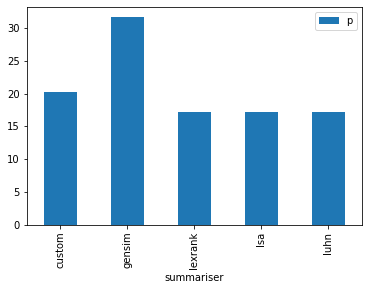

In [56]:
scores.plot.bar(x='summariser', y='p')

##### Using ROUGE-2 score for Evaluation:

In [59]:
all_scores = [ scores_custom[0]['rouge-2'], scores_gensim[0]['rouge-2'], scores_lexrank[0]['rouge-2'], scores_lsa[0]['rouge-2'], scores_luhn[0]['rouge-2'] ]
pd.DataFrame(all_scores)

,f,p,r
0,0.063694,0.051020,0.084746
1,0.254717,0.176471,0.457627
2,0.144279,0.084548,0.491525
3,0.144279,0.084548,0.491525
4,0.144279,0.084548,0.491525


In [60]:
scores = labels.join(pd.DataFrame(all_scores).drop(labels = ['f','r'], axis = 1))
scores

,summariser,p
0,custom,0.051020
1,gensim,0.176471
2,lexrank,0.084548
3,lsa,0.084548
4,luhn,0.084548


In [0]:
scores = scores[scores.select_dtypes(include=['number']).columns] * 100
scores = labels.join(scores)

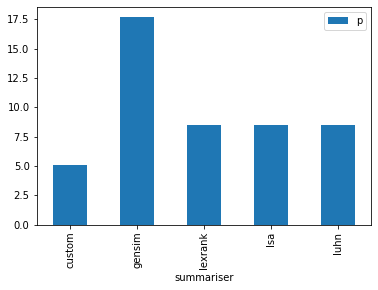

In [62]:
scores.plot.bar(x='summariser', y='p')